<a href="https://colab.research.google.com/github/kukichocollis/dl08/blob/main/notebook/MLP_MNIST_784.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MLP
- MNIST dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(X.shape, y.shape)

(70000, 784) (70000,)


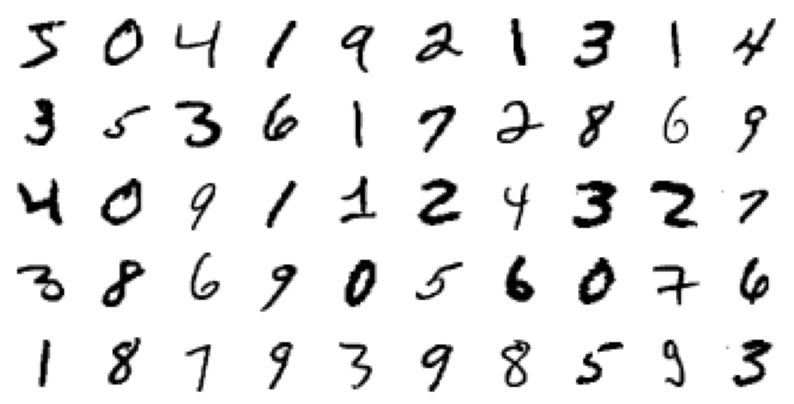

In [4]:
fig, axes = plt.subplots(5, 10, figsize=(10, 5))
i = 0
for ax in axes.flat:  # 
    ax.imshow(X[i].reshape(28, 28), cmap='binary')
    ax.axis('off')    
    i += 1
plt.savefig('digits.pdf')

In [5]:
np.unique(y, return_counts=True), y.shape

((array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
  array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958])),
 (70000,))

In [6]:
X = X / 255.0

In [7]:
train_size = 60000
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [8]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(300,), early_stopping=True, 
                    verbose=True)

In [ ]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.35415292
Validation score: 0.950167
Iteration 2, loss = 0.15504686
Validation score: 0.964833
Iteration 3, loss = 0.10840875
Validation score: 0.969833
Iteration 4, loss = 0.08041958
Validation score: 0.972333
Iteration 5, loss = 0.06253450
Validation score: 0.973167


In [ ]:
print('Accuracy on training set:', mlp.score(X_train, y_train))
print('Accuracy on test set:', mlp.score(X_test, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot(cmap='Blues')

plt.savefig('confusion_matrix.pdf')

Visualization of the weights

In [ ]:
print(mlp.coefs_[0].shape,mlp.coefs_[1].shape)

In [ ]:
fig, axes = plt.subplots(4, 5)

for coef, ax in zip(mlp.coefs_[0].T, axes.flat):
    im = ax.imshow(coef.reshape(28, 28), cmap='gray')
    ax.axis('off')
    
fig.colorbar(im, ax=axes.flat)
plt.savefig('mlp_weights.pdf')

---